In this project, the KMeans algorithm will be applied to develop insights about different clusters that can be formed from analysing the data.

In [35]:
#Importing the Libraries
!pip install yellowbrick
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [36]:
# Set view option to view all the columns
pd.set_option('display.max_columns', None)
data = pd.read_csv('finaldata')

In [37]:
# Replace column with value '999999' with mode 
data['Customer seniority (in months)'].mode()
data.replace([-999999.0, 21], inplace = True) 

This should have appeared in the data cleaning and transformation section but was missed.

## Feature Engineering

Inspecting the dataframe, columns starting from Saving Account down to Direct debit can be termed as products or offers offered by the bank to its clients or customers.

In [38]:
# Create column that totals the total number of bank products used by a customer
data['Total products'] = data.iloc[:, 20:45].sum(axis= 1)
data

,Unnamed: 0,Customer code,Employee index,Customer's Country residence,Customer's sex,Age,Date of first contract(account was created),New customer Index,Customer seniority (in months),Customer type,Customer type at the beginning of the month,Customer relation type at the beginning of the month,Residence index,Foreigner index,Channel used by the customer to join,Deceased index,Province code (customer's address),Province name,Activity index,Gross income of the household,Saving Account,Guarantees,Current Account,Derivada Account,Payroll Account,Junior Account,Más particular Account,Particular Account,Particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions.1,Direct Debit,Total products
0,0,1375586,N,ES,M,35.0,2015-01-12,0.0,6.0,1.0,1.0,A,Y,N,KHL,N,29.0,MALAGA,1.0,87218.10000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
1,1,1050611,N,ES,F,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,Y,Y,KHE,N,13.0,CIUDAD REAL,0.0,35548.74000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
2,2,1050612,N,ES,F,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,Y,N,KHE,N,13.0,CIUDAD REAL,0.0,122179.11000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
3,3,1050613,N,ES,M,22.0,2012-08-10,0.0,35.0,1.0,1.0,I,Y,N,KHD,N,50.0,ZARAGOZA,0.0,119775.54000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
4,4,1050614,N,ES,F,23.0,2012-08-10,0.0,35.0,1.0,1.0,A,Y,N,KHE,N,50.0,ZARAGOZA,1.0,139646.15094,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,1183296,N,ES,M,27.0,2013-09-25,0.0,22.0,1.0,1.0,A,Y,N,KFC,N,28.0,MADRID,1.0,55516.98000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,1.0
999996,999996,1183295,N,ES,M,56.0,2013-09-25,0.0,22.0,1.0,1.0,A,Y,N,KFC,N,15.0,"CORUÑA, A",1.0,75654.84000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
999997,999997,1183294,N,ES,F,39.0,2013-09-25,0.0,22.0,1.0,1.0,A,Y,N,KFC,N,15.0,"CORUÑA, A",1.0,80634.87000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2.0
999998,999998,1183293,N,ES,F,36.0,2013-09-25,0.0,22.0,1.0,1.0,A,Y,Y,KFC,N,28.0,MADRID,1.0,57818.46000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,2.0


In [39]:
# Print columns in dataframe
data.columns

Index(['Unnamed: 0', 'Customer code', 'Employee index',
       'Customer's Country residence', 'Customer's sex', 'Age',
       'Date of first contract(account was created)', 'New customer Index',
       'Customer seniority (in months)', 'Customer type',
       'Customer type at the beginning of the month',
       'Customer relation type at the beginning of the month',
       'Residence index', 'Foreigner index',
       'Channel used by the customer to join', 'Deceased index',
       'Province code (customer's address)', 'Province name', 'Activity index',
       'Gross income of the household', 'Saving Account', 'Guarantees',
       'Current Account', 'Derivada Account', 'Payroll Account',
       'Junior Account', 'Más particular Account', 'Particular Account',
       'Particular Plus Account', 'Short-term deposits',
       'Medium-term deposits', 'Long-term deposits', 'e-account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit Card', 'Securities',
       'Home Accoun

<AxesSubplot:>

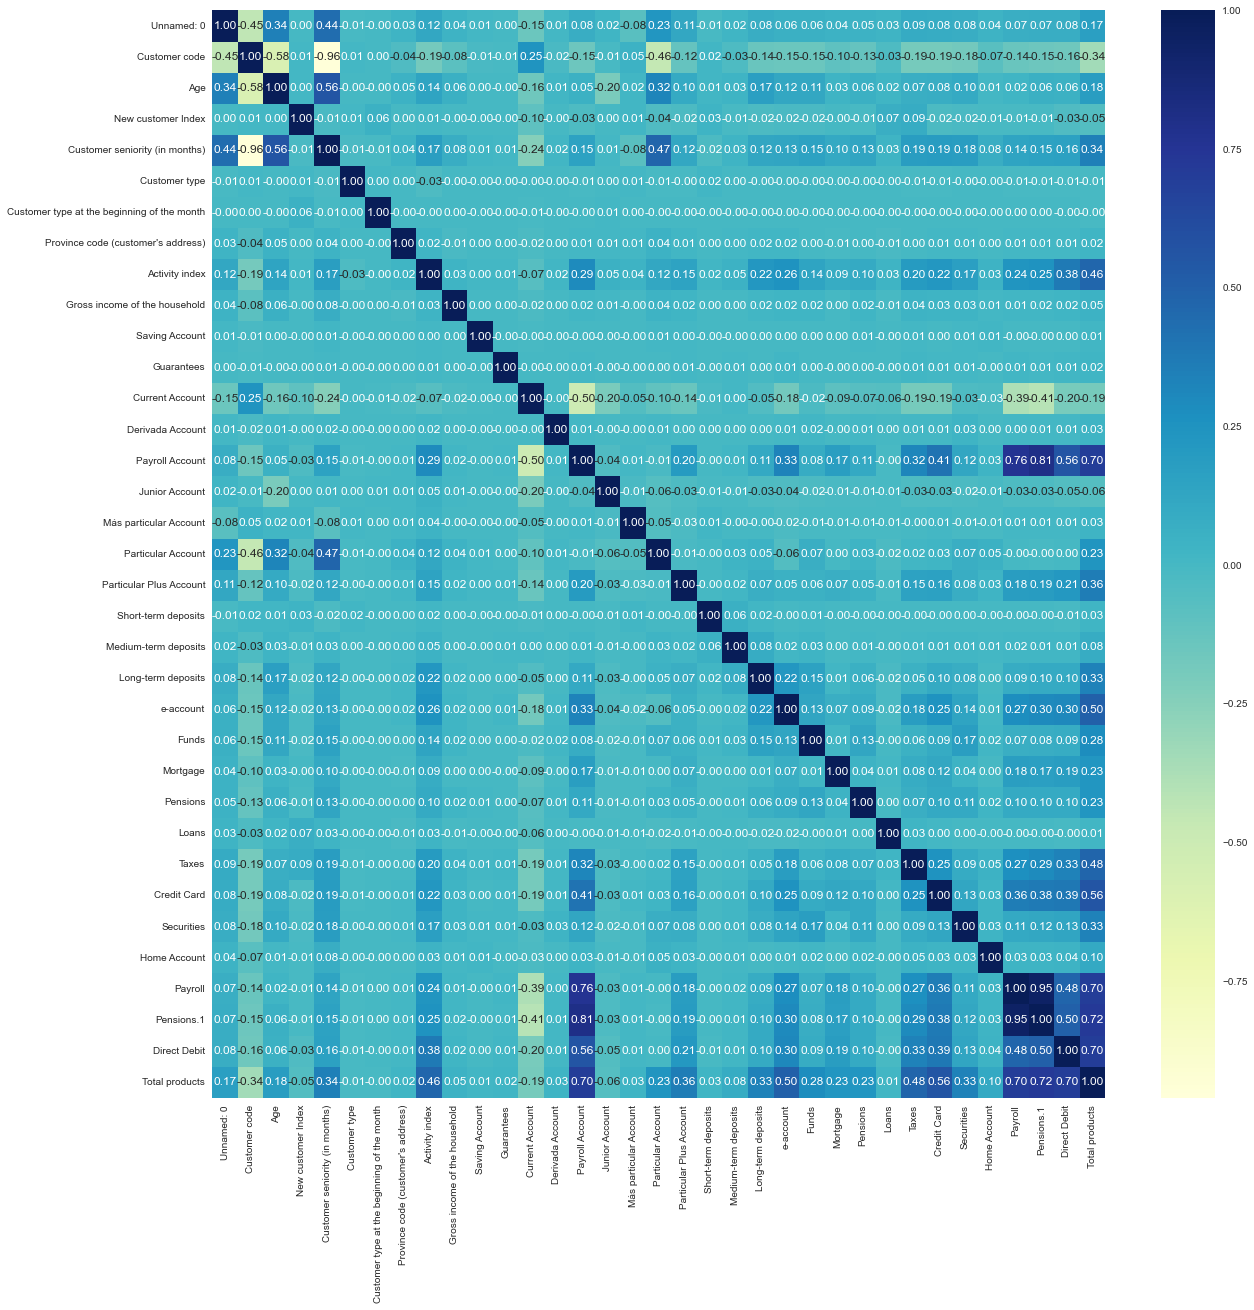

In [40]:
# Checking correlation of columns
matrix = data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(matrix, cmap = 'YlGnBu', annot = True, fmt = '.2f')

# PREPROCESSING

In [41]:
# Selecting dominant column values
ds= data[data['Customer\'s Country residence']=='ES']
ds= data[data['Customer type']==1]
ds= data[data['Customer relation type at the beginning of the month']!='P']
ds= data[data['Customer type at the beginning of the month']==1]
ds= data[data['New customer Index']==0] 
ds= data[data['Residence index']=='Y']

Data exploration indicated that some features have dominant occurrence across respective columns. Analysis should be geared towards features with marginal imapact, hence, selection of these dominant categories for analysis.

In [42]:
# Let's subset the data to keep only the records from six major channels
subset = [ "KAT", "KFC", "KHE", "KFA", "KAS", "KAG"]
ds = data.loc[data['Channel used by the customer to join'].isin(subset)]

## Label Encoding

In [43]:
# Get list of categorical variables
s = (ds.dtypes == 'object')
object_cols = list(s[s].index)

In [44]:
# Label Encoding the object data types
LE=LabelEncoder()
for i in object_cols:
    ds[i]=ds[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


## Feature Scaling

In [45]:
# Creating a copy of data
ds = ds.copy()

# Dropping unwanted features
cols_del = ['Date of first contract(account was created)', 'Customer code', 'Unnamed: 0', 'Province name']
ds = ds.drop(cols_del, axis=1)

# Scaling
scaler = preprocessing.MinMaxScaler()
scaled_frame= scaler.fit_transform(ds)
scaled_df = pd.DataFrame(scaled_frame, columns=ds.columns)
print("All features are now scaled")
scaled_df

All features are now scaled


,Employee index,Customer's Country residence,Customer's sex,Age,New customer Index,Customer seniority (in months),Customer type,Customer type at the beginning of the month,Customer relation type at the beginning of the month,Residence index,Foreigner index,Channel used by the customer to join,Deceased index,Province code (customer's address),Activity index,Gross income of the household,Saving Account,Guarantees,Current Account,Derivada Account,Payroll Account,Junior Account,Más particular Account,Particular Account,Particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions.1,Direct Debit,Total products
0,0.75,0.33,0.0,0.184211,0.0,0.142276,0.0,0.0,0.5,1.0,1.0,1.0,0.0,0.235294,0.0,0.001189,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667
1,0.75,0.33,0.0,0.184211,0.0,0.142276,0.0,0.0,0.5,1.0,0.0,1.0,0.0,0.235294,0.0,0.004187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667
2,0.75,0.33,0.0,0.184211,0.0,0.142276,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.960784,1.0,0.004792,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667
3,0.75,0.33,1.0,0.184211,0.0,0.142276,0.0,0.0,0.5,1.0,0.0,1.0,0.0,0.862745,0.0,0.000727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667
4,0.75,0.33,1.0,0.184211,0.0,0.142276,0.0,0.0,0.5,1.0,0.0,1.0,0.0,0.450980,0.0,0.010189,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884973,0.75,0.33,1.0,0.219298,0.0,0.089431,0.0,0.0,0.0,1.0,0.0,0.8,0.0,0.529412,1.0,0.001880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.066667
884974,0.75,0.33,1.0,0.473684,0.0,0.089431,0.0,0.0,0.0,1.0,0.0,0.8,0.0,0.274510,1.0,0.002577,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667
884975,0.75,0.33,0.0,0.324561,0.0,0.089431,0.0,0.0,0.0,1.0,0.0,0.8,0.0,0.274510,1.0,0.002749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.133333
884976,0.75,0.33,0.0,0.298246,0.0,0.089431,0.0,0.0,0.0,1.0,1.0,0.8,0.0,0.529412,1.0,0.001959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.133333


The columns below helped guide decisions that were made.

In [75]:
data['Guarantees'].value_counts()

0    999961
1        39
Name: Guarantees, dtype: int64

In [76]:
scaled_df['Guarantees'].value_counts()

0.0    884945
1.0        33
Name: Guarantees, dtype: int64

## Dimensionality reduction

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why performing dimensionality reduction will be performed on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.* 

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [48]:
# Applying PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(scaled_df))
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,-0.712855,-0.257173,0.410866,-0.416723,0.136229,-0.121720,0.075445,-0.038773,0.281116,0.028699,0.030310,0.032173,0.035801,0.915574,0.204019,0.067374,-0.045015,0.009174,-0.000474,0.057779,0.003034,0.010127,-0.007894,0.009507,-0.005290,0.006355,-0.132397,0.008685,0.001275,0.004925,-0.004964,0.000655,-0.001734,-0.000068,0.001009,0.000624,-0.000228,-0.002892,-0.000026,0.000053,-2.407826e-14
1,-0.706083,-0.267758,0.405402,-0.408695,0.146397,-0.111334,0.135252,-0.022311,0.240949,0.103635,0.001177,0.005204,0.010562,-0.047394,0.017132,0.012919,-0.006279,0.002409,0.005697,0.045769,0.008779,0.013244,-0.023197,-0.001225,-0.022927,-0.006295,0.003318,0.007945,0.000769,0.004454,0.000816,0.000198,-0.001610,-0.000232,0.000026,0.000218,-0.000043,0.000235,-0.000078,-0.000022,3.015548e-15
2,-0.080420,-0.379649,-0.380180,-0.538693,-0.262172,-0.295965,0.154506,-0.012255,-0.461920,0.020711,0.141126,-0.021680,0.045413,-0.025671,0.002255,0.058905,-0.043570,0.002318,-0.069268,-0.005523,0.002168,0.009725,-0.059775,-0.014060,-0.039572,-0.012046,-0.002250,0.012383,-0.002846,0.004970,-0.003988,-0.001327,-0.000524,-0.000898,0.000093,0.000582,-0.000101,0.000968,0.000147,-0.000003,-4.257961e-15
3,-0.815085,0.593963,0.089616,-0.029966,0.171408,-0.026739,0.084467,-0.023699,-0.372259,0.058537,0.076797,0.021484,0.033253,-0.041370,0.037287,0.034591,-0.015952,-0.001780,0.001180,0.037398,0.005474,0.013759,-0.028731,0.002715,-0.023169,-0.007243,0.003013,0.007239,0.000072,0.005199,0.001784,-0.000078,-0.001943,0.000269,-0.000211,-0.000497,0.000012,-0.003110,0.000001,-0.000011,-2.575290e-14
4,-0.820375,0.595844,0.093138,-0.038711,0.172298,-0.037885,0.086291,-0.015978,0.035502,0.073350,0.028986,0.010809,0.022917,-0.053626,0.031653,0.028043,-0.014275,-0.000835,0.001829,0.038119,0.004520,0.012848,-0.024801,0.002619,-0.022143,-0.006719,0.004254,0.006878,0.000250,0.004915,0.001756,0.000057,-0.001825,0.000262,-0.000156,-0.000440,0.000034,0.006182,-0.000042,-0.000032,3.685873e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884973,0.502435,0.720096,-0.156811,-0.052363,-0.447939,-0.294095,-0.349484,-0.768842,-0.063857,0.167167,-0.362411,0.074917,-0.013516,-0.066747,0.059616,-0.037604,0.040757,0.180568,0.030065,-0.135806,0.001716,-0.020784,-0.107115,-0.070286,-0.068888,-0.016389,0.003973,0.008889,0.001417,0.006326,-0.010028,-0.001926,-0.001175,0.000286,0.000034,0.000465,-0.000079,-0.002201,-0.000039,0.000073,-5.023243e-18
884974,-0.165388,0.452036,-0.689411,-0.122724,-0.239226,-0.150697,0.031233,0.066296,0.222405,-0.062714,0.013572,-0.034040,0.003519,-0.045226,-0.048889,-0.059578,0.051888,-0.038004,-0.038684,-0.157312,-0.003439,-0.068008,0.053939,-0.022314,0.102200,0.022653,0.007454,-0.016770,-0.002661,-0.016651,-0.001268,-0.002849,-0.001075,-0.000488,-0.000096,0.001127,0.000184,-0.002089,0.000074,0.000083,1.251144e-17
884975,0.955279,0.022548,0.387933,-0.483552,-0.376240,-0.504188,-0.152122,-0.611358,0.172764,0.124869,-0.414414,0.080241,-0.064336,-0.056953,0.058790,-0.061105,0.092879,-0.619612,-0.022427,0.069560,-0.003607,0.011527,0.038525,-0.042562,0.028009,0.005957,0.009418,-0.081422,-0.001510,-0.009699,-0.000892,-0.001903,-0.000907,-0.000448,-0.000013,0.001184,0.000120,-0.001354,-0.000106,0.000095,-4.037126e-18
884976,0.313500,-0.269193,-0.350001,-0.695217,0.173520,-0.313969,-0.281548,-0.545200,-0.036293,-0.034459,-0.307843,0.083913,-0.054457,0.923996,0.173788,-0.000643,0.009867,0.093583,-0.009796,-0.059430,-0.003605,-0.020535,0.020836,-0.033379,0.027896,0.014222,-0.130817,-0.001106,-0.000365,-0.001639,-0.008845,-0.001136,-0.001336,-0.000452,0.001153,0.001046,-0.000223,-0.002280,-0.000006,0.000074,9.680155e-18


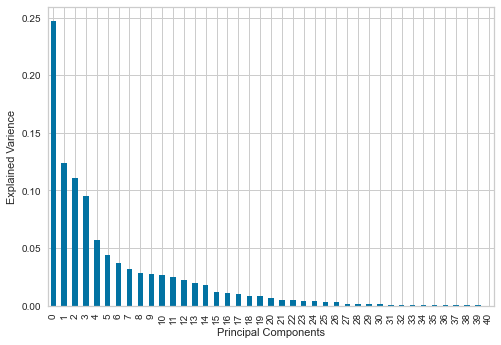

In [49]:
# Viewing variance of principal components
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

Majority of information is captured by components 3 (first 3 or 4, clarify)

In [50]:
#Initiating PCA to reduce dimensions/ features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,884978.0,-5.774881e-15,0.712837,-0.966343,-0.607943,-0.091553,0.311279,2.676103
col2,884978.0,1.467206e-15,0.503943,-0.979636,-0.396459,-0.191932,0.495904,1.347070
col3,884978.0,4.017727e-17,0.477371,-0.914709,-0.381797,0.090090,0.402379,1.699702


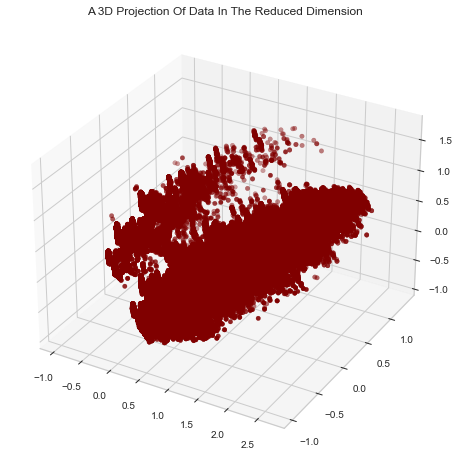

In [51]:
# A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## KMeans Clustering 

Elbow Method to determine the number of clusters to be formed:


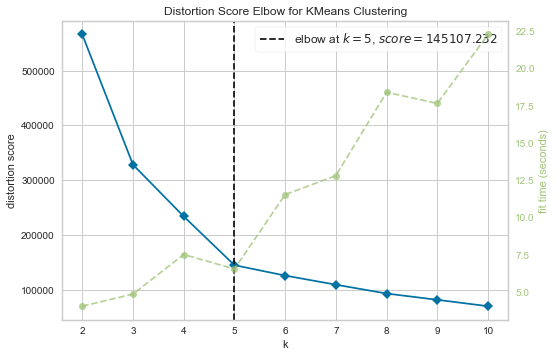

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [53]:
# Setting up color map
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [54]:
# Initiating the K-Means Clustering model
kmeans5 = KMeans(n_clusters=5)
# Fit model and predict clusters
y_kmeans5 = kmeans5.fit_predict(PCA_ds)
print(y_kmeans5)
# Adding the Clusters feature to dataframe 'ds'.
ds["Clusters"]= y_kmeans5


[4 4 1 ... 2 1 3]


In [55]:
# Print the centers of 5 clusters
kmeans5.cluster_centers_

array([[-0.68857289,  0.53487507,  0.15038306],
       [ 0.26116138, -0.51029659, -0.30844875],
       [ 1.6203424 ,  0.42620128,  0.51653659],
       [ 0.09953252,  0.38492716, -0.60257166],
       [-0.4865194 , -0.36257366,  0.4975291 ]])

In [56]:
# Printing the interia value

# Inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster. It
# tells us how far the points within a cluster are. The distance between them should be as low as possible.


kmeans5.inertia_

145107.2968211346

In [57]:
# Viewing data points in the 5 clusters

frame = pd.DataFrame(PCA_ds)
frame['cluster'] = y_kmeans5
frame['cluster'].value_counts()

1    240380
4    208493
0    177593
3    169598
2     88914
Name: cluster, dtype: int64

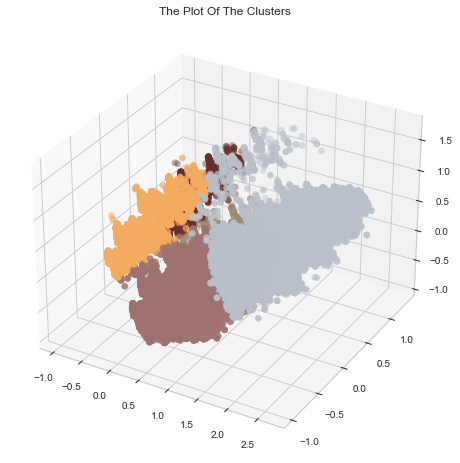

In [58]:
# Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=y_kmeans5, marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

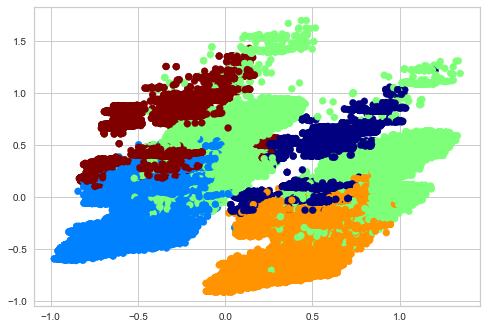

In [59]:
# Visualising in 2D
plt.scatter(PCA_ds.iloc[:,1],PCA_ds.iloc[:,2], c = y_kmeans5, cmap='jet')

# Model Evaluation

Since this is an unsupervised clustering, there is no tagged feature to evaluate or score the model. The purpose of this section is to study patterns in the clusters formed and determine the nature of the clusters' patterns. 

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions. 
Visualisations are grouped into the following three categories:
1. Distribution of data points in clusters
2. Scatter plots of features against age
3. Scatter plots of features against clusters

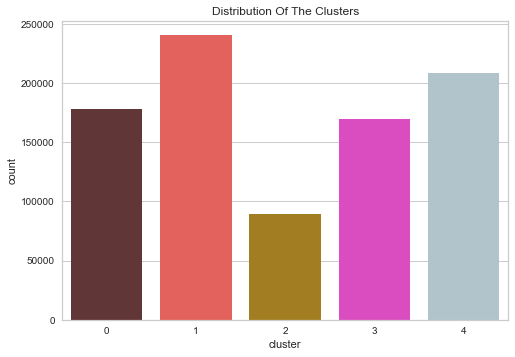

In [60]:
# Plotting countplot of clusters
pal = ["#682F2F","#FB4D46", "#B8860B","#F036D1", "#AEC6CF"]
pl = sns.countplot(x=PCA_ds["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

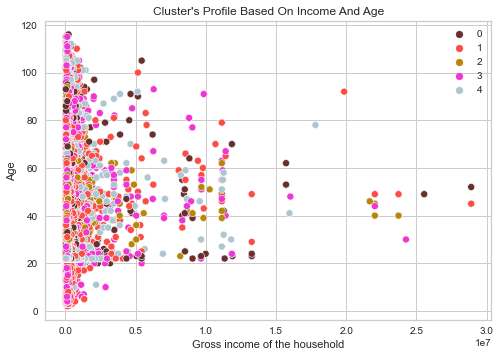

In [61]:
# Income feature against age
pl = sns.scatterplot(data = ds,x=ds["Gross income of the household"], y=ds["Age"],hue=ds["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Age")
plt.legend()
plt.show()

<!-- AGE
Cluster 3 members are not below age 20 and not above 100
Cluster 0, 4 and 1 span all age groups
Cluster 2 members are not below 20

INCOME
Cluster 1 income less than 2 exp 7
Cluster 3 and 4 income less than 2.5 exp 7
Cluster 0 and 2 span all through
 -->

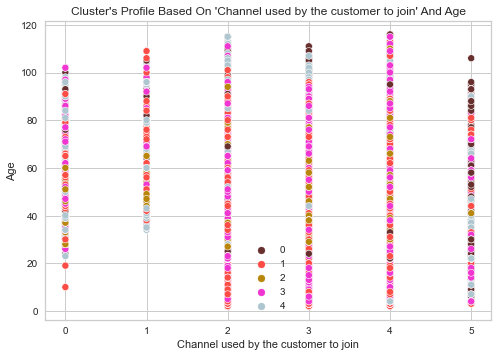

In [62]:
# Channel feature against age
pl = sns.scatterplot(data = ds,y=ds["Age"], x=ds["Channel used by the customer to join"],hue=ds["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On 'Channel used by the customer to join' And Age")
plt.legend()
plt.show()

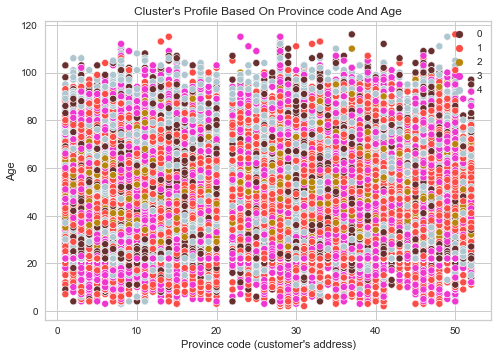

In [63]:
# Province feature against age
pl = sns.scatterplot(data = ds,x=ds["Province code (customer's address)"], y=ds["Age"],hue=ds["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Province code And Age")
plt.legend()
plt.show()

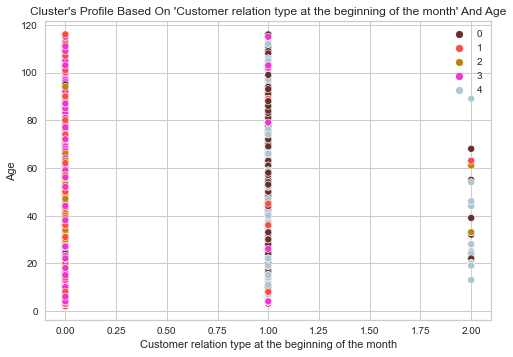

In [64]:
# Customer relation type at the beginning of the month against age
pl = sns.scatterplot(data = ds,x=ds["Customer relation type at the beginning of the month"], y=ds["Age"],hue=ds["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On 'Customer relation type at the beginning of the month' And Age")
plt.legend()
plt.show()


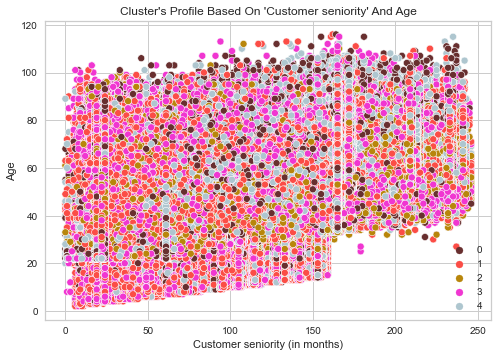

In [65]:
# Customer seniority feature against age
pl = sns.scatterplot(data = ds,x=ds["Customer seniority (in months)"], y=ds["Age"],hue=ds["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On 'Customer seniority' And Age")
plt.legend()
plt.show()


## Insights
- Majority of customers are between 40 and 80 as that portion has dense concentration.
- Majority of bank holder's income range falls below 5,000,000.
- Clusters 0, 3 and 4 dominate type A at the beginning of the month with 2 dominating type P. 
- KFC's age bracket starts at 40
- Clusters 1 and 3 boast of more data points with least customer seniority
- Cluster 0 has a bit more older customers

<!-- CUSTOMER RELATION TYPE
Cluster 3 occcupy all customer relation types 
Cluster 4 largely in customer relation type A, but also in type I
Cluster 0 only in type P
Cluster 2 only in type I
Cluster 1 in types I and P

TOTAL PRODUCTS
Cluster 3 uses the most number of products, followed by cluster 4.
Clusters 1 uses no bank product while clusters 2 and 0 use single bank products. -->

In [66]:
len(ds.columns)

42

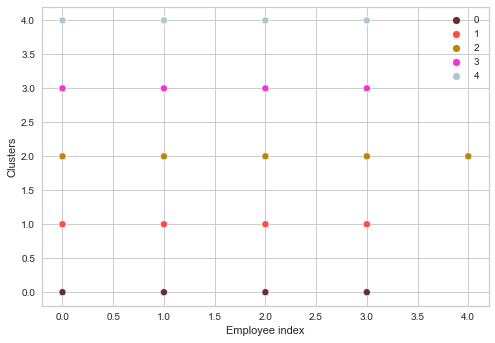

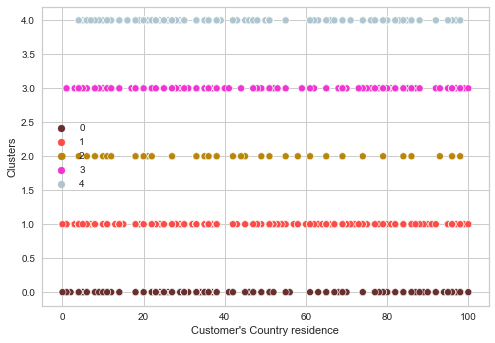

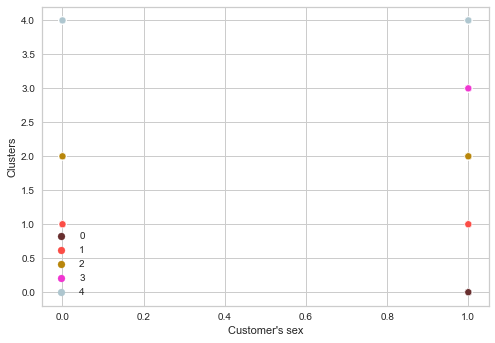

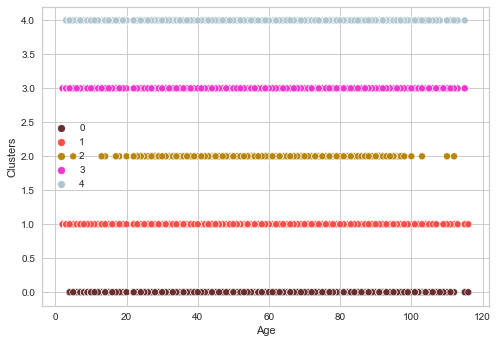

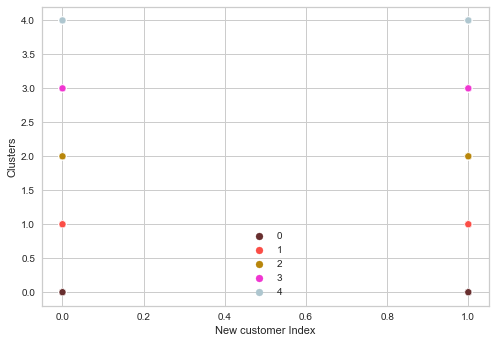

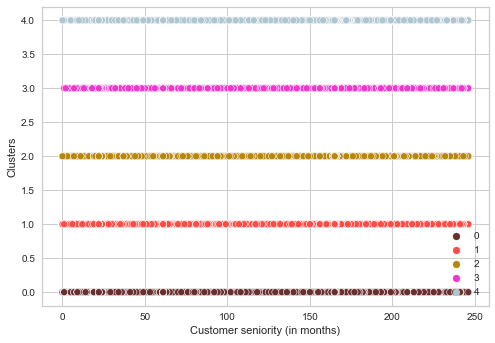

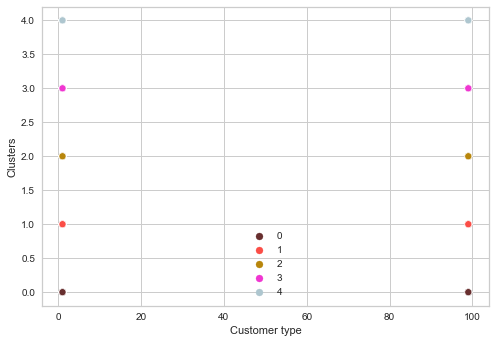

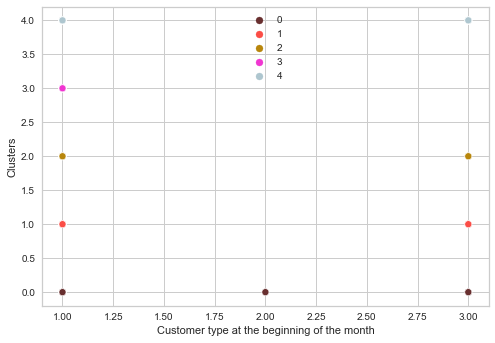

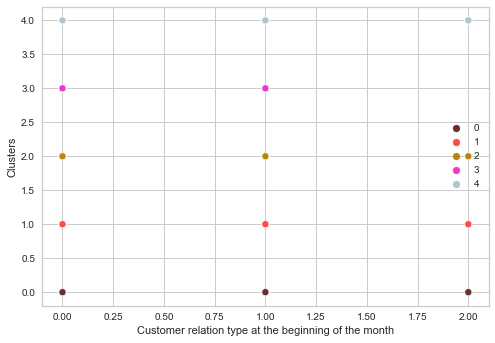

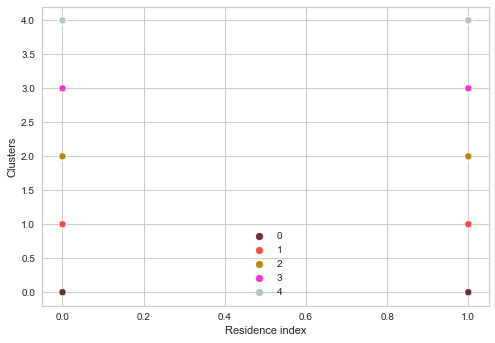

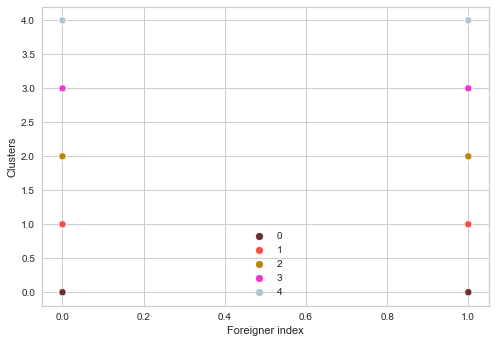

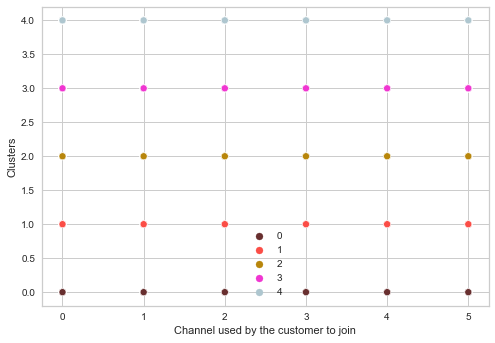

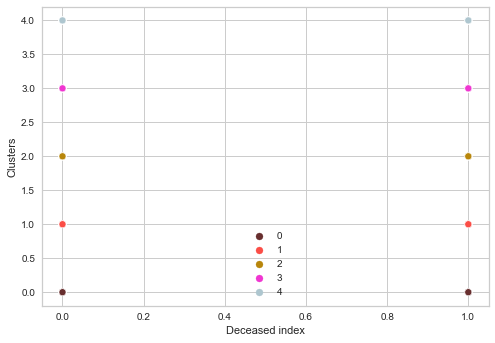

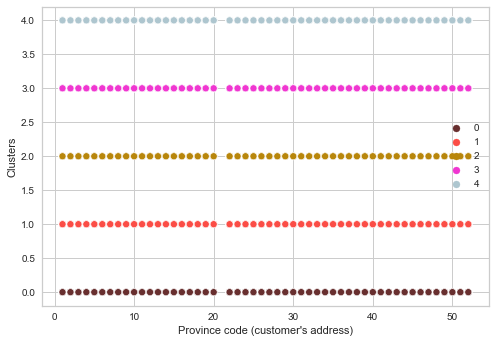

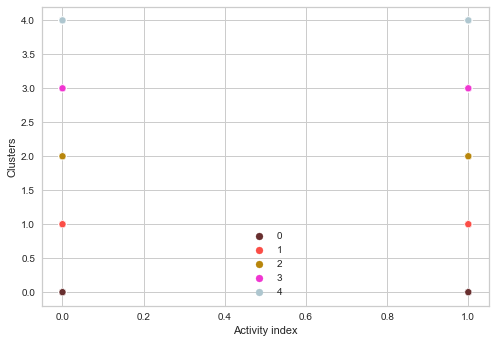

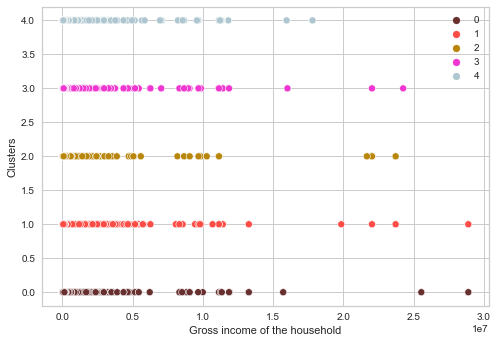

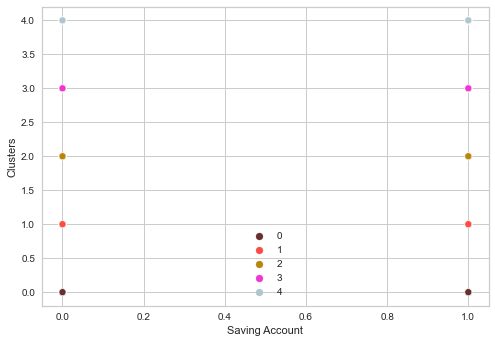

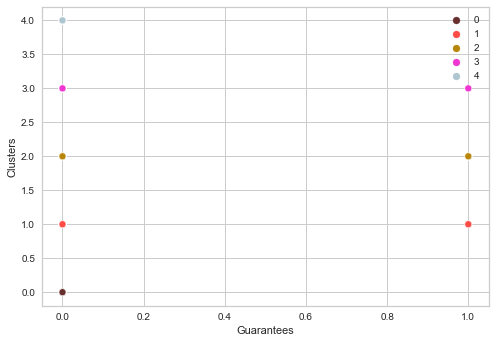

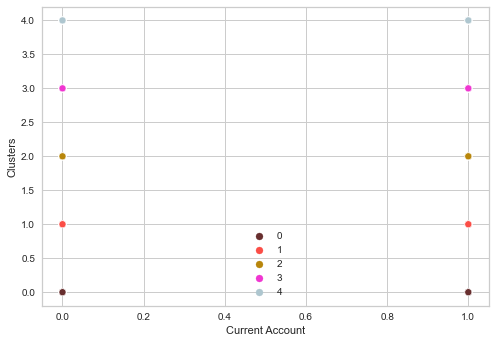

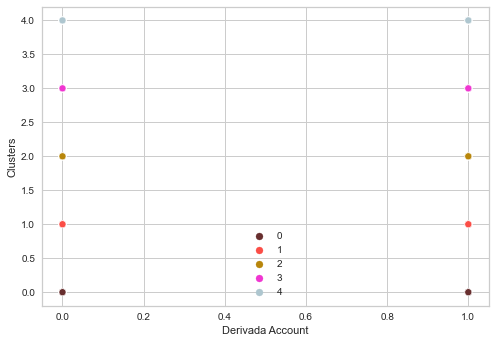

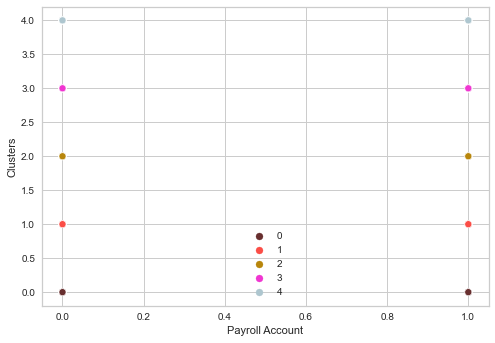

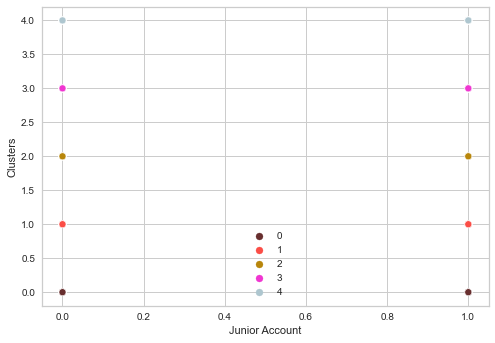

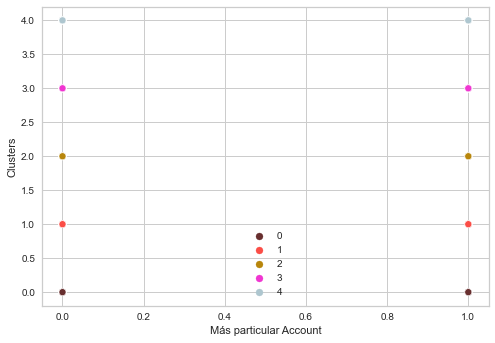

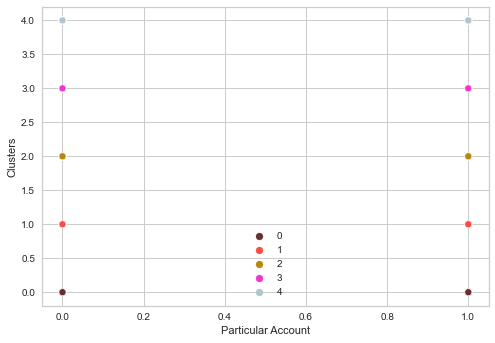

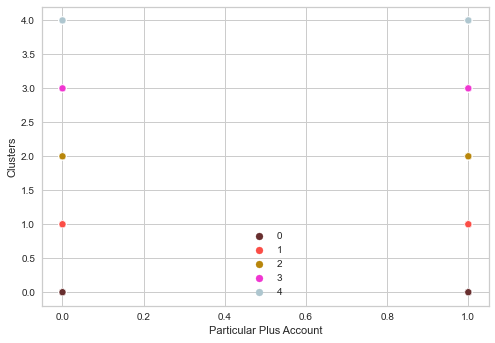

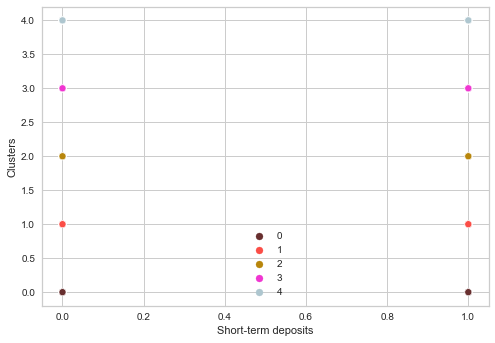

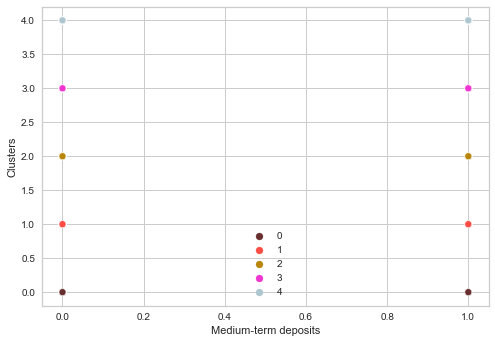

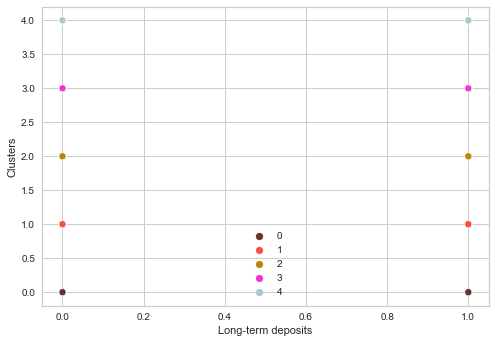

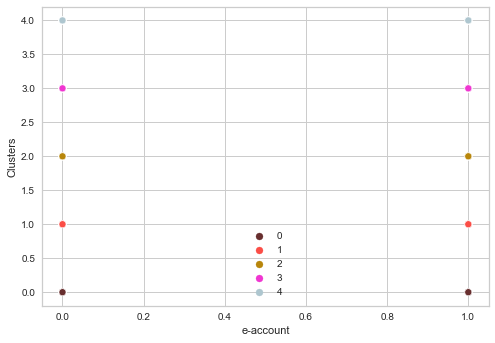

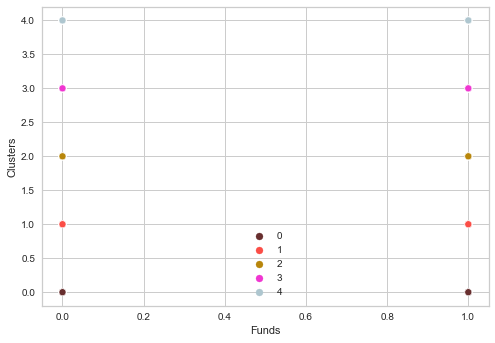

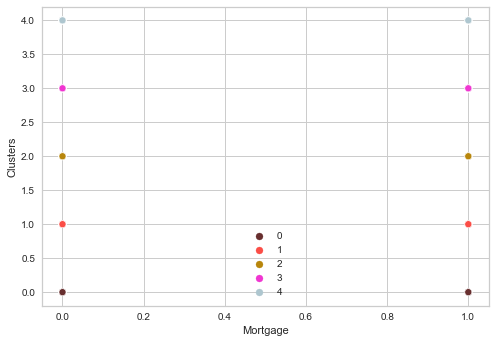

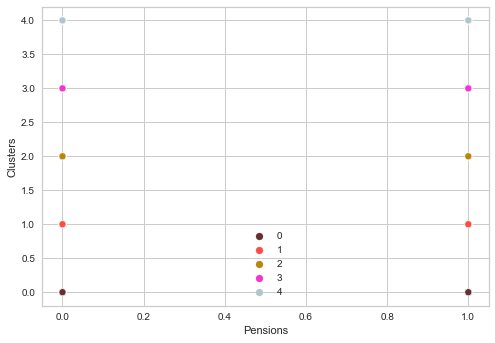

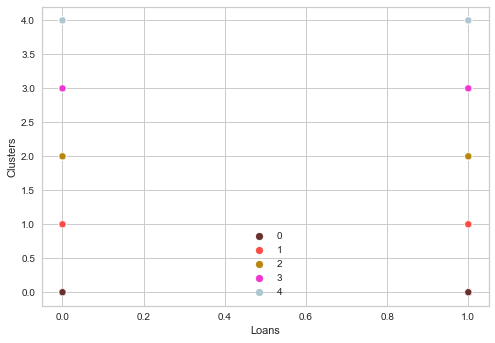

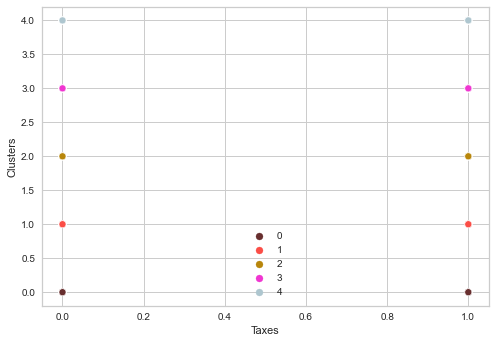

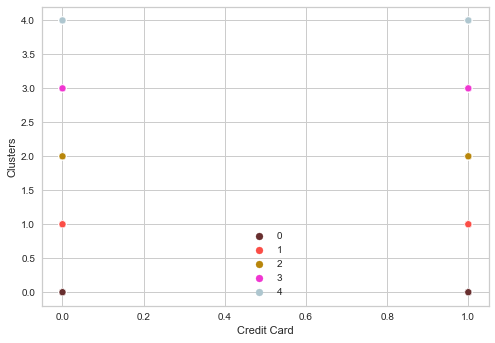

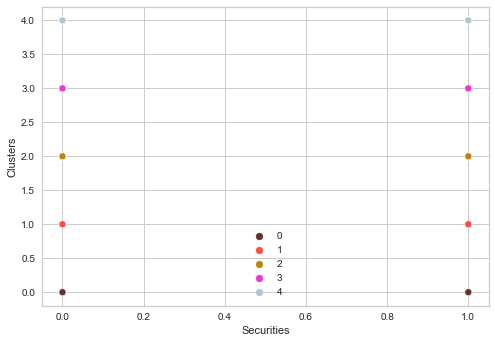

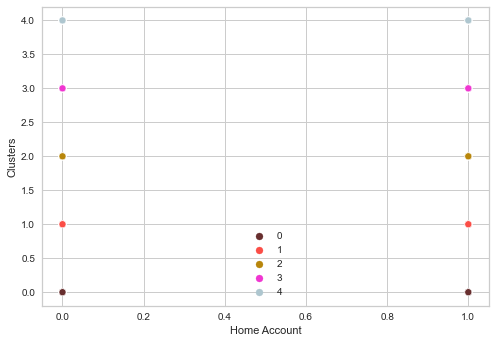

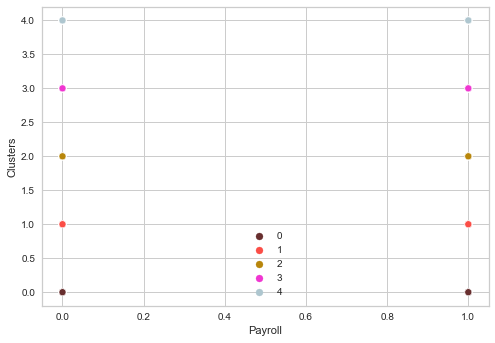

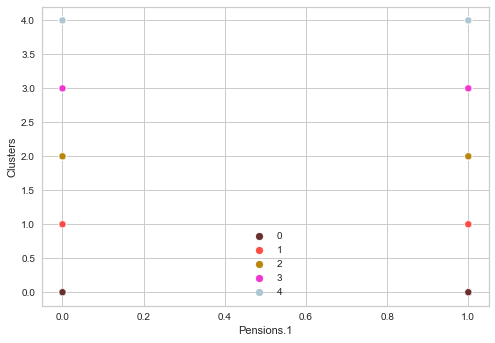

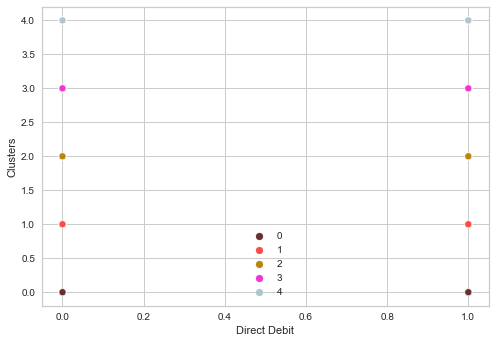

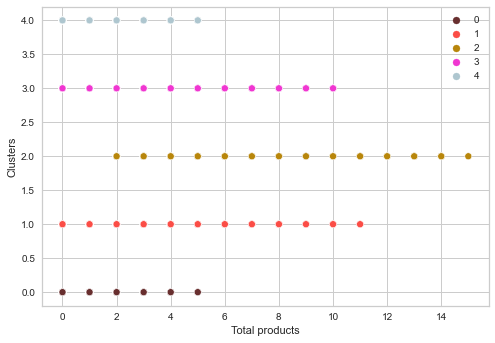

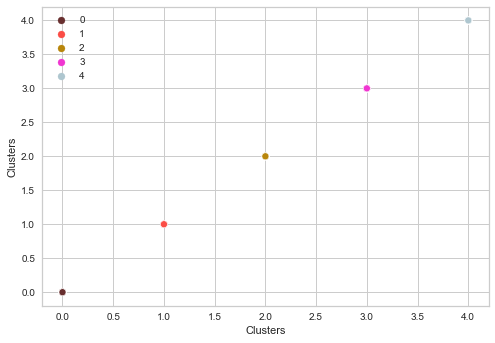

In [67]:
# Plotting individual features against cluster groups
col = list(ds.columns)
for i in range(42):
    pl = sns.scatterplot(data = ds, x= col[i], y= ds["Clusters"], hue= ds["Clusters"], palette= pal)
    plt.legend()
    plt.show()

Based on the Exploratory analysis done, the following assumptions are made about the clusters:
1. Cluster 0
- Male only
- Spans all customer types at the beginning of the month
- No guarantees
- Uses maximum 5 products
- 3rd largest representation

2. Cluster 1
- Wide income range, no limit
- Uses maximum 11 products
- Largest representation

3. Cluster 2
- Few teenagers and few older ones(above 100)
- Income limit 25,000,000
- Minimum of 2 and maximum of 15 products. 
- Least representation

4. Cluster 3
- Male only
- Customer relation type A and I only at the beginning of the month
- Customer type 1 only at the beginning of the month
- Income limit 25,000,000
- Uses maximum 10 products
- Fairly large share in all 6 major channels used to join

5. Cluster 4
- Income limit 20,000,000 
- No guarantees
- Uses maximum 5 products
- 2nd largest representation

Aside these variances, all other products have a fair representation among the clusters

## Miscellaneous

In [68]:
# Special customer using 15 products
data[data['Total products']>14]

,Unnamed: 0,Customer code,Employee index,Customer's Country residence,Customer's sex,Age,Date of first contract(account was created),New customer Index,Customer seniority (in months),Customer type,Customer type at the beginning of the month,Customer relation type at the beginning of the month,Residence index,Foreigner index,Channel used by the customer to join,Deceased index,Province code (customer's address),Province name,Activity index,Gross income of the household,Saving Account,Guarantees,Current Account,Derivada Account,Payroll Account,Junior Account,Más particular Account,Particular Account,Particular Plus Account,Short-term deposits,Medium-term deposits,Long-term deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions.1,Direct Debit,Total products
797816,797816,121159,N,ES,F,47.0,1999-02-11,0.0,197.0,1.0,1.0,A,Y,N,KAT,N,28.0,MADRID,1.0,137924.73,0,0,1,0,1,0,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,1.0,1.0,1,15.0
